In [33]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import preprocessing, datasets
import matplotlib.pyplot as plt
import matplotlib as mpl
import warnings
import os
import scipy
from sklearn.random_projection import GaussianRandomProjection
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, adjusted_mutual_info_score, silhouette_samples
import sys
import time
import matplotlib.cm as cm
import pandas as pd
from sklearn.metrics import homogeneity_score, completeness_score, \
v_measure_score, adjusted_rand_score, adjusted_mutual_info_score, silhouette_score
from sklearn import mixture
import itertools
from scipy import linalg
from sklearn import metrics
from sklearn.decomposition import PCA , FastICA
import seaborn as sns
color = sns.color_palette()

In [2]:

def extract_labels( file):
    labels = []
    new_labels=[]
    f = open(file)
    for line in f:
        labels.append( line.rstrip())
    for x in labels:
        new_labels.append(int(x))
    #print(len(new_labels))
    new_labels = np.asarray(new_labels)
    return new_labels
    #print( data_set.shape, new_labels.shape)
    #new_labels = np.transpose(new_labels)
    #print( type(new_labels), type(data_set))

In [3]:
def prepare_dataSet( input_file):
    data_set= []
    f = open(input_file)
    for line in f:
        data_set.append(line.split(' '))
    
    resulting_data=[]
    for data in data_set:
        data1 = [x.strip(' ') for x in data]
        data2=[]
        for x in data1:
            if(len(x) >0):
                data2.append(float(x))
        
        resulting_data.append( data2)
    
    
    #return resulting_data
    return np.asarray(resulting_data)

In [4]:
# loading the data 
X_train1 = prepare_dataSet( './DataSet/train/X_train.txt')
X_train1 = preprocessing.StandardScaler().fit_transform(X_train1)
#X_train1 = preprocessing.scale(X_train1)
y_train1 = extract_labels('./DataSet/train/y_train.txt')
X_test1 = prepare_dataSet('./DataSet/test/X_test.txt')
X_test1= preprocessing.scale( X_test1)

y_test1 = extract_labels('./DataSet/test/y_test.txt')

In [5]:
print( X_train1.shape, y_train1.shape)

(7352, 561) (7352,)


In [8]:
# Kmeans inertia analysis 

""" DOing kmeans clustering on the data set """

def Kmeans_clustering( X):
	clusters = list(range( 1, 10))
	inertia_arr = []

	for c in clusters:
		print(c)
		cluster = KMeans( n_clusters =c, random_state=14, n_init = 50)
		cluster_labels = cluster.fit(X)
		inertia_arr.append( cluster.inertia_)
	inertia_arr =np.array( inertia_arr)
	plt.plot(clusters,inertia_arr)
	plt.xlabel('Number of Clusters')
	plt.ylabel('Inertia')
	plt.title('Choosing Best k with Inertia')
	plt.grid()
	plt.show()

In [9]:
# Kmeans clustering Silhouette analysis 

def Kmeans_silhouette_analysis(X,y):
	cluster_range = [2]
	for num_cluster in cluster_range:
	    fig, (ax1, ax2) = plt.subplots(1, 2)
	    fig.set_size_inches(18, 7)
	   
	    ax1.set_xlim([-0.1, 1])
	    ax1.set_ylim([0, len(X) + (num_cluster + 1) * 10])

	    clusterer = KMeans(n_clusters=num_cluster, random_state=10)
	    cluster_labels = clusterer.fit_predict(X)

	    silhouette_avg = silhouette_score(X, cluster_labels)
	    print("For n_clusters = ", num_cluster,
	          "The average silhouette_score is :", silhouette_avg)
	    sample_silhouette_values = silhouette_samples(X, cluster_labels)

	    y_lower = 10
	    for i in range(num_cluster):
	        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

	        ith_cluster_silhouette_values.sort()

	        size_cluster_i = ith_cluster_silhouette_values.shape[0]
	        y_upper = y_lower + size_cluster_i

	        color = cm.nipy_spectral(float(i) / num_cluster)
	        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)

	        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

	        y_lower = y_upper + 10 

	    ax1.set_title("The silhouette plot for the various clusters.")
	    ax1.set_xlabel("The silhouette coefficient values")
	    ax1.set_ylabel("Cluster label")

	    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

	    ax1.set_yticks([])  
	    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

	    colors = cm.nipy_spectral(cluster_labels.astype(float) / num_cluster)
	    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
	                c=colors, edgecolor='k')

	    centers = clusterer.cluster_centers_

	    ax2.scatter(centers[:, 0], centers[:, 1], marker='o', c="white", alpha=1, s=200, edgecolor='k')

	    for i, c in enumerate(centers):
	        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50, edgecolor='k')

	    ax2.set_title("The visualization of the clustered data.")
	    ax2.set_xlabel("Feature space for the 1st feature")
	    ax2.set_ylabel("Feature space for the 2nd feature")

	    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data with num_cluster = %d" % num_cluster),fontsize=14, fontweight='bold')
	plt.show()

1
2
3
4
5
6
7
8
9


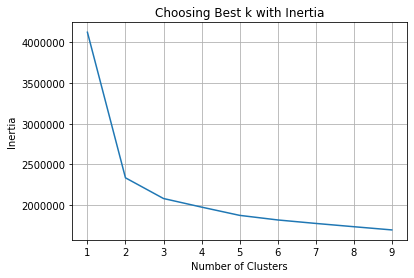

In [11]:
# Kmeans finding cluster based on the inertia elbow analysis from this we can see that the k value is 2 

Kmeans_clustering( X_train1)

For n_clusters =  2 The average silhouette_score is : 0.3965049403141253


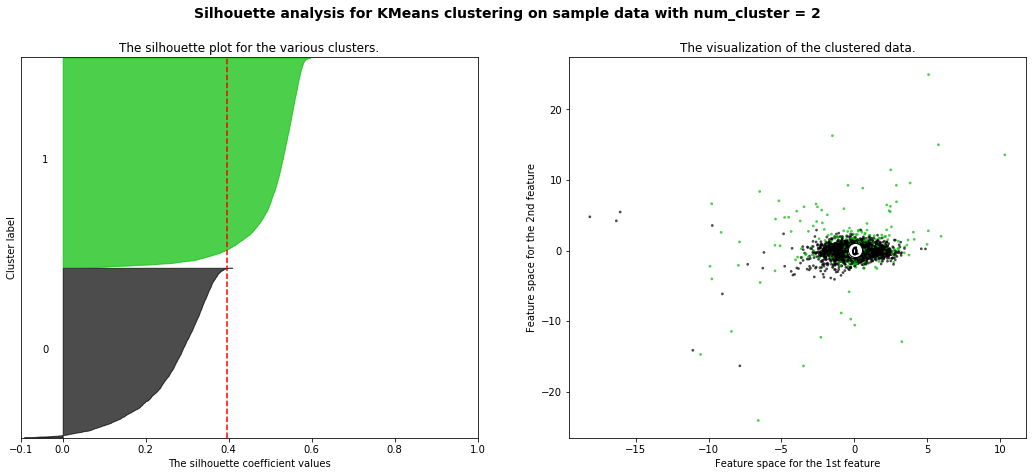

In [12]:
# Now using the silhouette analysis for cluster 

# here we have shown the distribution of the data for 2 clusters 
Kmeans_silhouette_analysis( X_train1, y_train1)

In [13]:
""" Expectation maximisation clustering on the activity dataset using gaussian mixture implemented in sklearn

the number of cluster found usind the BIC criteria which cluster lowers the BIC value"""



def gmm_analysis(X,y):
	lowest_bic = np.infty
	bic = []
	n_components_range = range(1, 8)
	cv_types = ['spherical', 'tied', 'diag', 'full']
	for cv_type in cv_types:
	    for n_components in n_components_range:
	        gmm = mixture.GaussianMixture(n_components=n_components, covariance_type=cv_type, max_iter = 200)
	        gmm.fit(X)
	        bic.append(gmm.bic(X))
	        if bic[-1] < lowest_bic:
	            lowest_bic = bic[-1]
	            best_gmm = gmm

	bic = np.array(bic)
	color_iter = itertools.cycle(['navy', 'turquoise', 'cornflowerblue','darkorange'])
	clf = best_gmm
	bars = []
	plt.figure(figsize=(8, 6))
	spl = plt.subplot(2, 1, 1)

	for i, (cv_type, color) in enumerate(zip(cv_types, color_iter)):
	    xpos = np.array(n_components_range) + .2 * (i - 2)
	    bars.append(plt.bar(xpos, bic[i * len(n_components_range):(i + 1) * len(n_components_range)], width=.2, color=color))
	
	plt.xticks(n_components_range)
	plt.ylim([bic.min() * 1.01 - .01 * bic.max(), bic.max()])
	plt.title('BIC score per model')
	xpos = np.mod(bic.argmin(), len(n_components_range)) + .65 + .2 * np.floor(bic.argmin() / len(n_components_range))
	best_num = np.mod(bic.argmin(), len(n_components_range)) + 1
	plt.text(xpos, bic.min() * 0.97 + .03 * bic.max(), '*', fontsize=14)
	spl.set_xlabel('Number of components')
	spl.legend([b[0] for b in bars], cv_types)

	
	splot = plt.subplot(2, 1, 2)
	Y_ = clf.predict(X)
	
	for i, (mean, cov, color) in enumerate(zip(clf.means_, clf.covariances_,color_iter)):
	    v, w = linalg.eigh(cov)
	    if not np.any(Y_ == i):
	        continue
	    plt.scatter(X[Y_ == i, 0], X[Y_ == i, 1], .8, color=color)

	    angle = np.arctan2(w[0][1], w[0][0])
	    angle = 180. * angle / np.pi 
	    v = 2. * np.sqrt(2.) * np.sqrt(v)
	    ell = mpl.patches.Ellipse(mean, v[0], v[1], 180. + angle, color=color)
	    ell.set_clip_box(splot.bbox)
	    ell.set_alpha(.5)
	    splot.add_artist(ell)
	
	plt.xticks(())
	plt.yticks(())
	plt.title('Selected GMM: full model,' + str(best_num) + ' components')
	plt.subplots_adjust(hspace=.35, bottom=.02)
	plt.show()
	return best_num

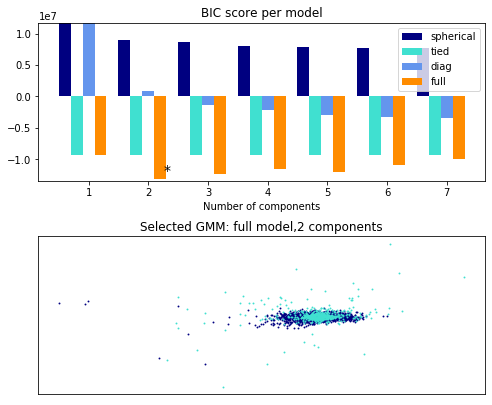

2

In [14]:
# Gaussian mixture also finds the number of component or clusters to be 2 and the covarinace as full which means 
# more freedom for the cluster


gmm_analysis( X_train1, y_train1)

In [22]:
# ICA dimensionality reduction 

# First PCA is done to reduce the dimensionality reduction and then ICA is done so first PCA is done to 100 componensts 


X_new = PCA( n_components=100).fit_transform( X_train1)
print( X_new.shape[1])

100


In [17]:
# now ICA is run on the new dataset and so IC's are found 
ica = FastICA( )

In [18]:
S = ica.fit_transform( X_new)

In [23]:
# to calculate which IC is more important ( non gaussian ness is required for this kurtosis value is calculated)

# higher the kurtosis value higher the non gaussian nature so kurtosis value is calculated for each IC 


kurtosis_values = [ (scipy.stats.kurtosis(  S[:,k])) for k in range( X_new.shape[1]) ]


In [26]:
print(kurtosis_values[0] , len(kurtosis_values))

2.0675329130022666 100


In [27]:
# Now we add labels to identify each kurtosis value to identify and sort them 

kurtosis_pairs = [(np.abs(kurtosis_values[i]), i) for i in range(len(kurtosis_values))]

In [28]:
print( kurtosis_pairs)

[(2.0675329130022666, 0), (3.896862507444075, 1), (18.38422594687666, 2), (3.8816570738181593, 3), (798.0180016122295, 4), (48.13905250378117, 5), (366.6244199992173, 6), (7.923981545734959, 7), (6.4655577616778, 8), (26.880511350682927, 9), (10.28449441144351, 10), (7.4031743668323795, 11), (0.8281455307692771, 12), (1.1114027681767773, 13), (4.169601091346977, 14), (19.403430375859124, 15), (9.449447203735824, 16), (81.18051129810092, 17), (6.0590179131041, 18), (357.84935291513386, 19), (1.2113847483117803, 20), (20.218081526980175, 21), (39.10562856374465, 22), (9.285369917329222, 23), (43.495928431017525, 24), (45.95734792114979, 25), (16.66139986258721, 26), (1.7084226538951777, 27), (7.44961032910142, 28), (180.8764485260933, 29), (10.70350575091591, 30), (4.772544561536076, 31), (49.4545160255467, 32), (2.6168485434432025, 33), (3.6230920794335812, 34), (2.6829538201290646, 35), (6.350717204562413, 36), (12.591728868750009, 37), (37.46292905208938, 38), (5.304954909069737, 39),

In [29]:
# sort them by kurtosis value 
kurtosis_pairs .sort(key=lambda x: x[0], reverse=True)

In [30]:
print( kurtosis_pairs)

[(798.0180016122295, 4), (366.6244199992173, 6), (357.84935291513386, 19), (341.03403650172805, 75), (225.20767576738305, 51), (180.8764485260933, 29), (109.23758515867742, 97), (91.20852956430474, 86), (82.74919185799102, 58), (81.18051129810092, 17), (77.74891164715119, 74), (64.03286909188964, 52), (61.810318107935544, 67), (54.08383669184933, 64), (49.4545160255467, 32), (48.13905250378117, 5), (45.95734792114979, 25), (45.875316871927815, 41), (43.495928431017525, 24), (42.63286557755596, 60), (39.10562856374465, 22), (37.46292905208938, 38), (37.24545504408797, 46), (31.006324505749603, 65), (27.29643851169745, 82), (27.189178435744314, 68), (26.880511350682927, 9), (26.455286645776507, 48), (24.606343430307362, 93), (20.218081526980175, 21), (19.403430375859124, 15), (18.38422594687666, 2), (18.357128258397825, 53), (16.66139986258721, 26), (16.09057414726484, 45), (14.948235181947396, 61), (14.790348639274061, 73), (12.591728868750009, 37), (11.437396733162418, 71), (11.4097856

In [31]:
x_values = [lis[1] for lis in kurtosis_pairs]
y_values= [lis[0] for lis in kurtosis_pairs] 

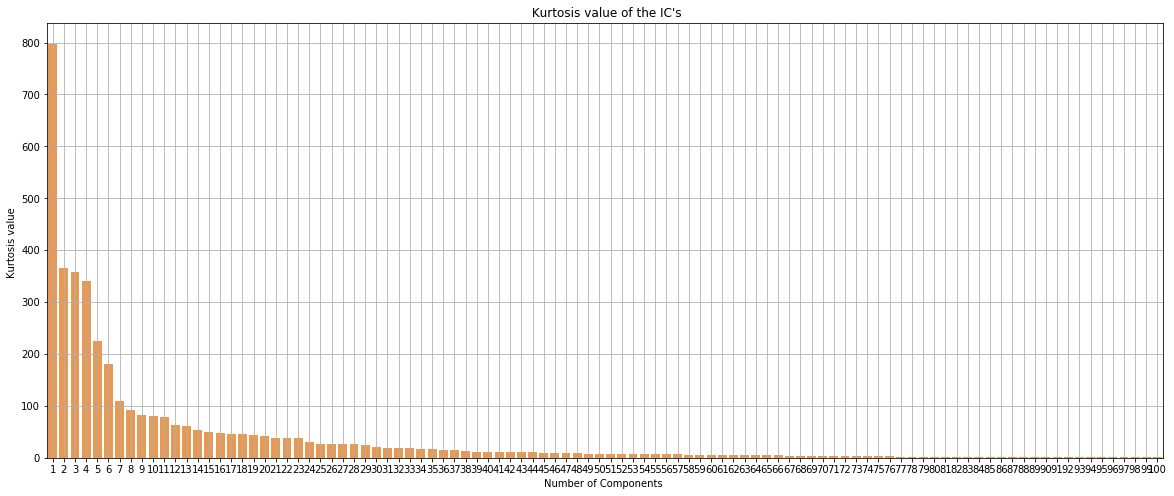

In [36]:
# plotting the eigen values in decreasing order 
plt.figure(figsize=(20,8))
sns.barplot(np.arange( 1, 101),y_values, alpha=0.8, color=color[1])
plt.xlabel('Number of Components ')
plt.ylabel('Kurtosis value ')
plt.title(" Kurtosis value of the IC's")
plt.grid()
plt.show()

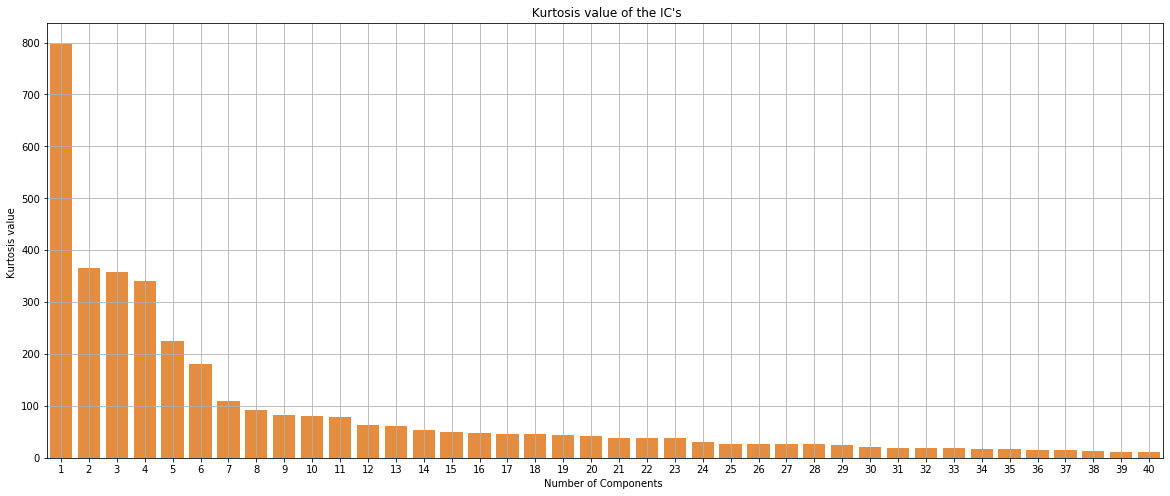

In [38]:
# we can see that first 10 or 20 are what have the largest value and rest are small 
# plotting the eigen values in decreasing order 
plt.figure(figsize=(20,8))
sns.barplot(np.arange( 1, 41),y_values[:40], alpha=0.9, color=color[1])
plt.xlabel('Number of Components ')
plt.ylabel('Kurtosis value ')
plt.title(" Kurtosis value of the IC's")
plt.grid()
plt.show()

In [ ]:
# now selected the first 20 components which have enough value and then